# Model training with +ve Xeff

## Load data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [3]:
outdir = "out_positive_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_positive_xeff.pkl")

In [4]:
data

,q,xeff,a1,p_a1
0,0.1,0.1,"[0.012024048096192383, 0.014003959823454523, 0...","[0.009216418726310445, 0.028458441503637077, 0..."
1,0.1,0.2,"[0.1222444889779559, 0.12400351805816039, 0.12...","[0.0013008215791223796, 0.004041149522956928, ..."
2,0.1,0.3,"[0.23246492985971942, 0.23400307629286626, 0.2...","[0.0010697856954987733, 0.0024382824268816272,..."
3,0.1,0.4,"[0.3426853707414829, 0.3440026345275721, 0.345...","[0.0009629691381983512, 0.00222891654232283, 0..."
4,0.1,0.5,"[0.45290581162324645, 0.454002192762278, 0.455...","[0.001315515963205737, 0.0027549382395791115, ..."
...,...,...,...,...
85,1.0,0.5,"[0.002004008016032064, 0.004003999983935807, 0...","[0.004842086019793161, 0.00951858515585301, 0...."
86,1.0,0.6,"[0.20240480961923846, 0.2040031967743101, 0.20...","[0.0010434286955042496, 0.0013208399318507351,..."
87,1.0,0.7,"[0.40280561122244485, 0.4040023935646844, 0.40...","[0.0018007422164230593, 0.0023384387900644075,..."
88,1.0,0.8,"[0.6032064128256512, 0.6040015903550587, 0.604...","[0.0032252396366210193, 0.004504994041532742, ..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [19]:
# data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)
# data.reset_index(drop=True, inplace=True)

### Stupid way of getting everything to  numpy arrays with dtyoe = float64

In [5]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [6]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Consider Normalizing the a1 and p

In [7]:
# from sklearn.preprocessing import MinMaxScaler
# scaler_a = MinMaxScaler()
# a1 = scaler_a.fit_transform(a1)
# scaler_p = MinMaxScaler()
# p = scaler_p.fit_transform(p)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

## Define evoluation function

In [10]:
def eva_model(model):
    # evaluate the model
    global test_a1
    global test_p
    global test_q_xeff
    scores = model.evaluate([test_q_xeff, test_a1], test_p)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    # plot history
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.title('model loss')
    plt.show()
    #
    test_p_pred = model.predict([test_q_xeff, test_a1])
    # test_p_pred = scaler_p.inverse_transform(test_p_pred)
    # test_p = scaler_p.inverse_transform(test_p)
    # test_a1 = scaler_a.inverse_transform(test_a1)
    plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
    plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
    plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()

    plt.plot(test_a1[8],test_p_pred[8],label = 'pred',color = 'red')
    plt.plot(test_a1[8],test_p[8],label = 'true',color = 'blue')
    plt.title(f'prediction vs true p_a1 for q = {test_q[5]}, xeff = {test_xeff[5]}')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()

## Define Model

In [11]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output

model = Model(inputs=[Input1,Input2], outputs=output)

In [12]:
opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy',])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 17.1601 - accuracy: 0.0000e+00 - val_loss: 6.3079 - val_accuracy: 0.0000e+00 - 960ms/epoch - 120ms/step
Epoch 2/500
8/8 - 0s - loss: 12.3413 - accuracy: 0.0000e+00 - val_loss: 3.9951 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 8.8532 - accuracy: 0.0000e+00 - val_loss: 7.5309 - val_accuracy: 0.0000e+00 - 41ms/epoch - 5ms/step
Epoch 4/500
8/8 - 0s - loss: 7.2313 - accuracy: 0.0175 - val_loss: 9.5543 - val_accuracy: 0.0000e+00 - 46ms/epoch - 6ms/step
Epoch 5/500
8/8 - 0s - loss: 5.1007 - accuracy: 0.0000e+00 - val_loss: 16.2629 - val_accuracy: 0.0000e+00 - 42ms/epoch - 5ms/step
Epoch 6/500
8/8 - 0s - loss: 4.2076 - accuracy: 0.0000e+00 - val_loss: 16.6028 - val_accuracy: 0.0000e+00 - 38ms/epoch - 5ms/step
Epoch 7/500
8/8 - 0s - loss: 4.7477 - accuracy: 0.0175 - val_loss: 18.9755 - val_accuracy: 0.0000e+00 - 40ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 5.0092 - accuracy: 0.0175 - val_loss: 17.4450 - val_accuracy: 0.0000

In [13]:
test_q_xeff = np.stack((test_q, test_xeff), axis=1)

1/1 [==============================] - 0s 32ms/step - loss: 5.1066 - accuracy: 0.2222
accuracy: 22.22%


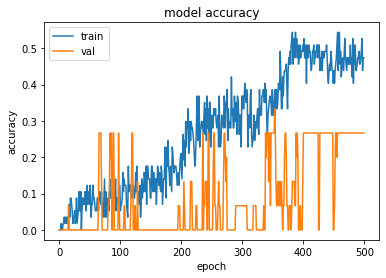

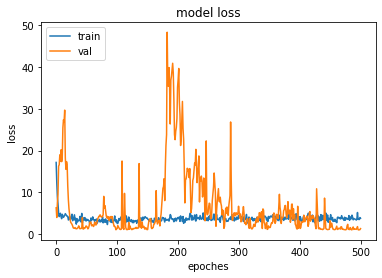

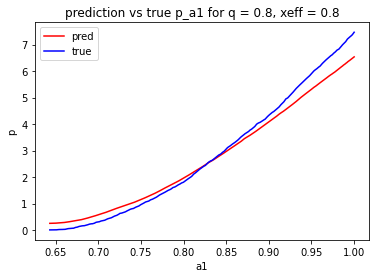

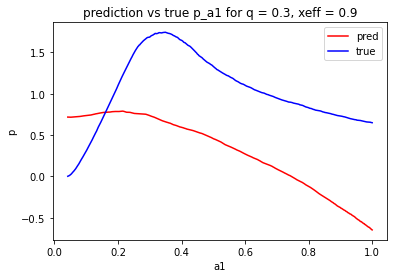

In [14]:
eva_model(model)

In [15]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output

model = Model(inputs=[Input1,Input2], outputs=output)

In [16]:
opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 14.6194 - accuracy: 0.0000e+00 - val_loss: 7.4501 - val_accuracy: 0.0000e+00 - 524ms/epoch - 66ms/step
Epoch 2/500
8/8 - 0s - loss: 13.8146 - accuracy: 0.0000e+00 - val_loss: 6.4786 - val_accuracy: 0.0000e+00 - 26ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 12.8492 - accuracy: 0.0000e+00 - val_loss: 5.3982 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 11.6001 - accuracy: 0.0000e+00 - val_loss: 3.6096 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 5/500
8/8 - 0s - loss: 10.3795 - accuracy: 0.0000e+00 - val_loss: 2.7174 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 9.2988 - accuracy: 0.0000e+00 - val_loss: 3.1869 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 7.6205 - accuracy: 0.0000e+00 - val_loss: 2.7345 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 8/500
8/8 - 0s - loss: 6.7107 - accuracy: 0.0175 - val_loss: 2.2720 - val_accuracy: 

1/1 [==============================] - 0s 25ms/step - loss: 3.0750 - accuracy: 0.2778
accuracy: 27.78%


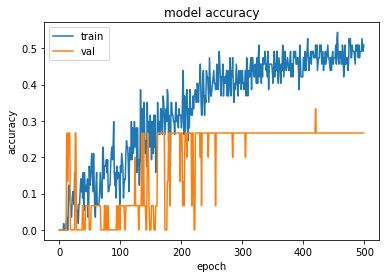

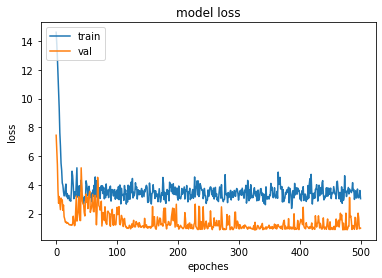

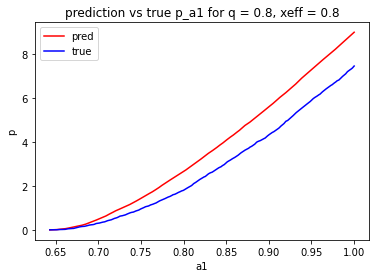

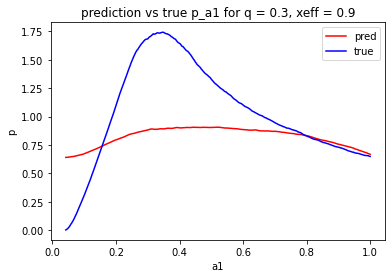

In [17]:
eva_model(model)

In [18]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(x) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)

output = keras.layers.Dense(500)(x) # Output

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 15.0061 - accuracy: 0.0000e+00 - val_loss: 6.8986 - val_accuracy: 0.0000e+00 - 845ms/epoch - 106ms/step
Epoch 2/500
8/8 - 0s - loss: 13.9321 - accuracy: 0.0000e+00 - val_loss: 5.8437 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 12.2000 - accuracy: 0.0000e+00 - val_loss: 5.5007 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 11.3499 - accuracy: 0.0000e+00 - val_loss: 5.2555 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 10.1984 - accuracy: 0.0175 - val_loss: 4.6657 - val_accuracy: 0.0000e+00 - 39ms/epoch - 5ms/step
Epoch 6/500
8/8 - 0s - loss: 9.4508 - accuracy: 0.0000e+00 - val_loss: 3.7560 - val_accuracy: 0.0000e+00 - 41ms/epoch - 5ms/step
Epoch 7/500
8/8 - 0s - loss: 8.9486 - accuracy: 0.0000e+00 - val_loss: 3.7506 - val_accuracy: 0.0000e+00 - 49ms/epoch - 6ms/step
Epoch 8/500
8/8 - 0s - loss: 8.0801 - accuracy: 0.0175 - val_loss: 4.4293 - val_accuracy: 0.0

1/1 [==============================] - 0s 27ms/step - loss: 0.8511 - accuracy: 0.2222
accuracy: 22.22%


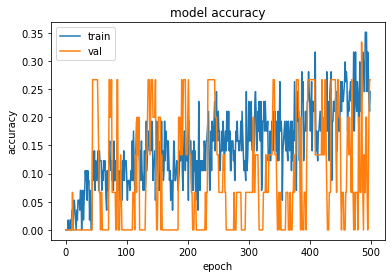

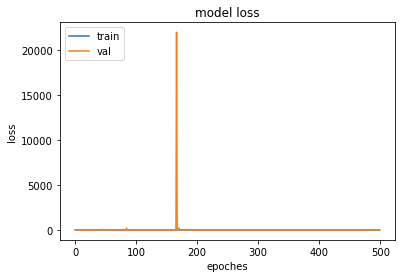

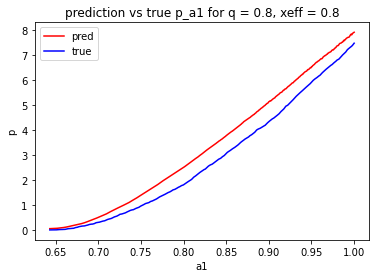

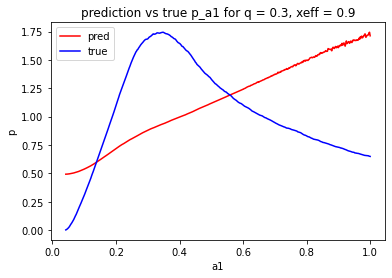

In [19]:
eva_model(model)

In [22]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=32, shuffle=True, verbose=2)

Epoch 1/500
2/2 - 1s - loss: 14.8930 - accuracy: 0.0000e+00 - val_loss: 8.0012 - val_accuracy: 0.0000e+00 - 526ms/epoch - 263ms/step
Epoch 2/500
2/2 - 0s - loss: 14.6057 - accuracy: 0.0000e+00 - val_loss: 7.7065 - val_accuracy: 0.0000e+00 - 19ms/epoch - 9ms/step
Epoch 3/500
2/2 - 0s - loss: 14.3088 - accuracy: 0.0000e+00 - val_loss: 7.3863 - val_accuracy: 0.0000e+00 - 21ms/epoch - 10ms/step
Epoch 4/500
2/2 - 0s - loss: 14.0091 - accuracy: 0.0000e+00 - val_loss: 7.2291 - val_accuracy: 0.0000e+00 - 23ms/epoch - 12ms/step
Epoch 5/500
2/2 - 0s - loss: 13.7430 - accuracy: 0.0000e+00 - val_loss: 7.0009 - val_accuracy: 0.0000e+00 - 22ms/epoch - 11ms/step
Epoch 6/500
2/2 - 0s - loss: 13.5063 - accuracy: 0.0000e+00 - val_loss: 6.5453 - val_accuracy: 0.0000e+00 - 45ms/epoch - 22ms/step
Epoch 7/500
2/2 - 0s - loss: 13.0976 - accuracy: 0.0000e+00 - val_loss: 6.1999 - val_accuracy: 0.0000e+00 - 21ms/epoch - 11ms/step
Epoch 8/500
2/2 - 0s - loss: 12.7949 - accuracy: 0.0000e+00 - val_loss: 5.8664 - v

1/1 [==============================] - 0s 19ms/step - loss: 3.0640 - accuracy: 0.1667
accuracy: 16.67%


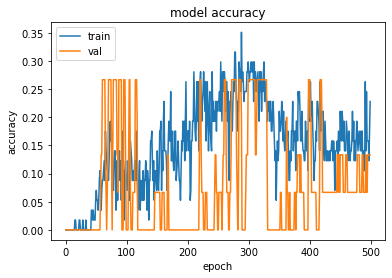

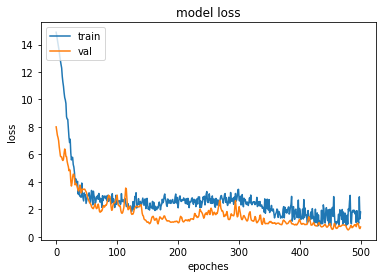

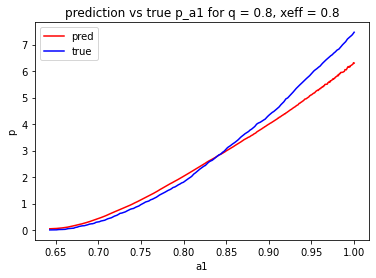

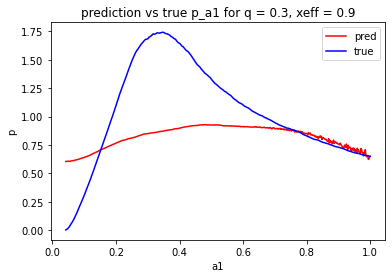

In [23]:
eva_model(model)

Try 2000 epochs L1 regularization

In [27]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=2000, batch_size=32, shuffle=True, verbose=2)

Epoch 1/2000
2/2 - 1s - loss: 26.8263 - accuracy: 0.0000e+00 - val_loss: 18.9036 - val_accuracy: 0.0000e+00 - 518ms/epoch - 259ms/step
Epoch 2/2000
2/2 - 0s - loss: 25.4007 - accuracy: 0.0000e+00 - val_loss: 17.5358 - val_accuracy: 0.0000e+00 - 18ms/epoch - 9ms/step
Epoch 3/2000
2/2 - 0s - loss: 24.0841 - accuracy: 0.0000e+00 - val_loss: 16.2438 - val_accuracy: 0.0000e+00 - 21ms/epoch - 10ms/step
Epoch 4/2000
2/2 - 0s - loss: 22.7139 - accuracy: 0.0000e+00 - val_loss: 15.1000 - val_accuracy: 0.0000e+00 - 22ms/epoch - 11ms/step
Epoch 5/2000
2/2 - 0s - loss: 21.5252 - accuracy: 0.0000e+00 - val_loss: 13.9652 - val_accuracy: 0.0000e+00 - 23ms/epoch - 12ms/step
Epoch 6/2000
2/2 - 0s - loss: 20.3507 - accuracy: 0.0000e+00 - val_loss: 12.9258 - val_accuracy: 0.0000e+00 - 25ms/epoch - 12ms/step
Epoch 7/2000
2/2 - 0s - loss: 19.3014 - accuracy: 0.0000e+00 - val_loss: 11.9341 - val_accuracy: 0.0000e+00 - 26ms/epoch - 13ms/step
Epoch 8/2000
2/2 - 0s - loss: 18.3470 - accuracy: 0.0000e+00 - val_l

1/1 [==============================] - 0s 20ms/step - loss: 3.6270 - accuracy: 0.2778
accuracy: 27.78%


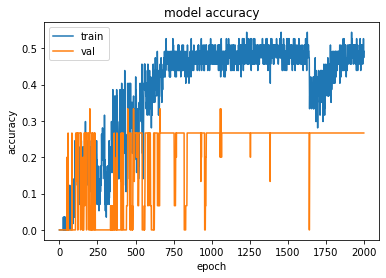

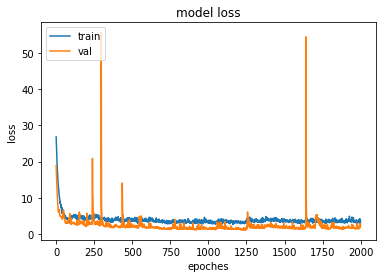

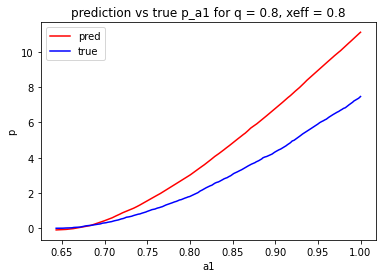

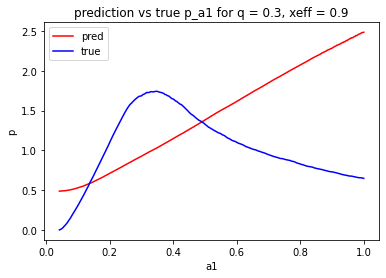

In [28]:
eva_model(model)

converged at ~1200 epoch 

In [29]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Dense
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Dense
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Dense
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=3000, batch_size=32, shuffle=True, verbose=2)

Epoch 1/3000
2/2 - 1s - loss: 26.8110 - accuracy: 0.0000e+00 - val_loss: 18.6628 - val_accuracy: 0.0000e+00 - 651ms/epoch - 325ms/step
Epoch 2/3000
2/2 - 0s - loss: 25.2190 - accuracy: 0.0000e+00 - val_loss: 17.1019 - val_accuracy: 0.0000e+00 - 20ms/epoch - 10ms/step
Epoch 3/3000
2/2 - 0s - loss: 23.8025 - accuracy: 0.0000e+00 - val_loss: 15.7782 - val_accuracy: 0.0000e+00 - 22ms/epoch - 11ms/step
Epoch 4/3000
2/2 - 0s - loss: 22.4541 - accuracy: 0.0000e+00 - val_loss: 14.7059 - val_accuracy: 0.0000e+00 - 21ms/epoch - 10ms/step
Epoch 5/3000
2/2 - 0s - loss: 21.3185 - accuracy: 0.0000e+00 - val_loss: 13.8339 - val_accuracy: 0.0000e+00 - 22ms/epoch - 11ms/step
Epoch 6/3000
2/2 - 0s - loss: 20.2458 - accuracy: 0.0000e+00 - val_loss: 12.8876 - val_accuracy: 0.0000e+00 - 29ms/epoch - 14ms/step
Epoch 7/3000
2/2 - 0s - loss: 19.3721 - accuracy: 0.0000e+00 - val_loss: 11.9376 - val_accuracy: 0.0000e+00 - 38ms/epoch - 19ms/step
Epoch 8/3000
2/2 - 0s - loss: 18.5453 - accuracy: 0.0000e+00 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.4022 - accuracy: 0.2778
accuracy: 27.78%


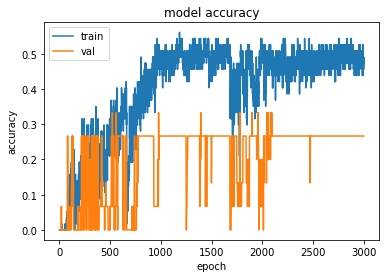

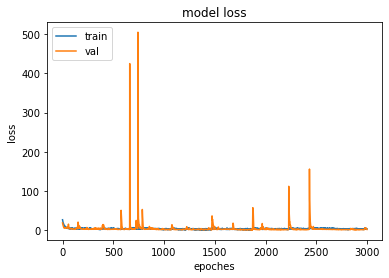

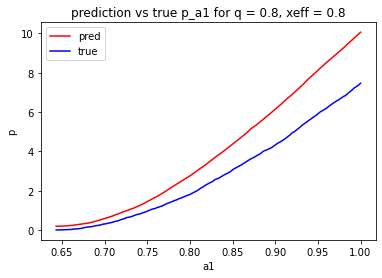

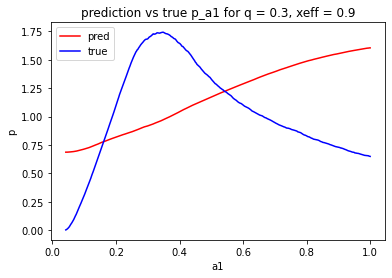

In [30]:
eva_model(model)